# 0. import dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import time


In [3]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Test/',
  image_size=(299, 299),
  batch_size=32,
  label_mode='categorical'
)

Found 379 files belonging to 8 classes.


In [9]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Mango_leaf/Model/inceptionV3_TransferLearning_MangoLeafBD.h5')

In [10]:
start_time = time.time()
total_time = 0
num_batches = 0

for images, labels in test_ds:
    start_batch_time = time.time()
    predictions = model.predict(images)
    batch_time = time.time() - start_batch_time
    print ("batch inference time : ",batch_time )
    total_time += batch_time
    num_batches += 1

average_inference_time = total_time / num_batches

print(f"Average inference time: {average_inference_time:.2f} seconds")

1/1 [==============================] - 6s 6s/step
batch inference time :  6.296874523162842
1/1 [==============================] - 5s 5s/step
batch inference time :  10.331872463226318
1/1 [==============================] - 5s 5s/step
batch inference time :  4.686959981918335
1/1 [==============================] - 6s 6s/step
batch inference time :  10.299603939056396
1/1 [==============================] - 5s 5s/step
batch inference time :  5.155519008636475
1/1 [==============================] - 5s 5s/step
batch inference time :  10.306346893310547
1/1 [==============================] - 6s 6s/step
batch inference time :  10.292925596237183
1/1 [==============================] - 5s 5s/step
batch inference time :  5.155550003051758
1/1 [==============================] - 5s 5s/step
batch inference time :  5.50951361656189
1/1 [==============================] - 5s 5s/step
batch inference time :  5.170097827911377
1/1 [==============================] - 6s 6s/step
batch inference time :  10.

In [12]:
image_path = '/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Test/Anthracnose/20211008_125130 (Custom).jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)

# Measure the inference time
start_time = time.time()
predictions = model.predict(image)
inference_time = time.time() - start_time

print(f"Inference time: {inference_time:.2f} seconds")

1/1 [==============================] - 0s 176ms/step
Inference time: 0.37 seconds


# Helper Functions

In [ ]:
def convert_ints_to_trueClasses (label_ints):

  number_of_samples = label_ints.shape[0]

  label_trueClass = np.full((number_of_samples,), "None", dtype=object)

  for i in range (len(label_ints)):
    if label_ints[i] == 0:
      label_trueClass[i] = 'Anthracnose'
    elif label_ints[i] == 1:
      label_trueClass[i] = 'Bacterial Canker'
    elif label_ints[i] == 2:
      label_trueClass[i] = 'Cutting Weevil'
    elif label_ints[i] == 3:
      label_trueClass[i] = 'Die Back'
    elif label_ints[i] == 4:
      label_trueClass[i] = 'Gall Midge'
    elif label_ints[i] == 5:
      label_trueClass[i] = 'Healthy'
    elif label_ints[i] == 6:
      label_trueClass[i] = 'Powdery Mildew'
    elif label_ints[i] == 7:
      label_trueClass[i] = 'Sooty Mould'


  return label_trueClass

In [ ]:
def Convert_labels (true_label, Pred_labels):

  true_label_not_one_hot = []
  pred_ladel_not_one_hot = []

  for r in true_label:
    true_label_not_one_hot.append(np.where(r==1)[0][0])

  true_label_not_one_hot = np.asarray(true_label_not_one_hot)

  true_label_not_one_hot = convert_ints_to_trueClasses (true_label_not_one_hot)

  for i in range (Pred_labels.shape[0]):

    pred_ladel_not_one_hot.append(np.argmax(Pred_labels[i]))

  pred_ladel_not_one_hot = np.asarray(pred_ladel_not_one_hot)

  pred_ladel_not_one_hot = convert_ints_to_trueClasses (pred_ladel_not_one_hot)

  return true_label_not_one_hot, pred_ladel_not_one_hot

# 1. Transfer Learning

## 1.1. load the model

In [ ]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/Mango_leaf/Model/inceptionV3_TransferLearning_MangoLeafBD.h5')

## 1.2. Predict

In [ ]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model_1.predict_on_batch(image_batch)

In [ ]:
print ("The type of true labels:",type(label_batch)," and its dims",label_batch.shape)
print ("The type of predicted labels:",type(predictions)," and its dims",predictions.shape)

The type of true labels: <class 'numpy.ndarray'>  and its dims (379, 8)
The type of predicted labels: <class 'numpy.ndarray'>  and its dims (379, 8)


In [ ]:
true_label_not_one_hot, pred_ladel_not_one_hot = Convert_labels (label_batch, predictions)
print (true_label_not_one_hot.shape, pred_ladel_not_one_hot.shape)

(379,) (379,)


## 1.3. Evaluation

In [ ]:
predictions.shape

(379, 8)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
accuracy = accuracy_score(true_label_not_one_hot, pred_ladel_not_one_hot)

precision = precision_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

recall = recall_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

f1 = f1_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

conf_matrix = confusion_matrix(true_label_not_one_hot, pred_ladel_not_one_hot)

report = classification_report(true_label_not_one_hot, pred_ladel_not_one_hot, labels=["Anthracnose", "Bacterial Canker","Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"])

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("F1-score:", f1)
print(report)

Accuracy: 0.9525065963060686
Precision: 0.9534905350962645
Recall: 0.9525065963060686
F1-score: 0.9525647669705554
                  precision    recall  f1-score   support

     Anthracnose       0.94      0.94      0.94        50
Bacterial Canker       1.00      0.98      0.99        49
  Cutting Weevil       1.00      1.00      1.00        30
        Die Back       1.00      0.94      0.97        50
      Gall Midge       0.94      0.94      0.94        50
         Healthy       0.91      1.00      0.95        50
  Powdery Mildew       0.94      0.94      0.94        50
     Sooty Mould       0.92      0.90      0.91        50

        accuracy                           0.95       379
       macro avg       0.96      0.95      0.96       379
    weighted avg       0.95      0.95      0.95       379



In [ ]:
roc_auc = roc_auc_score(true_label_not_one_hot, predictions, multi_class='ovr')
print(roc_auc)

0.9984037289964341


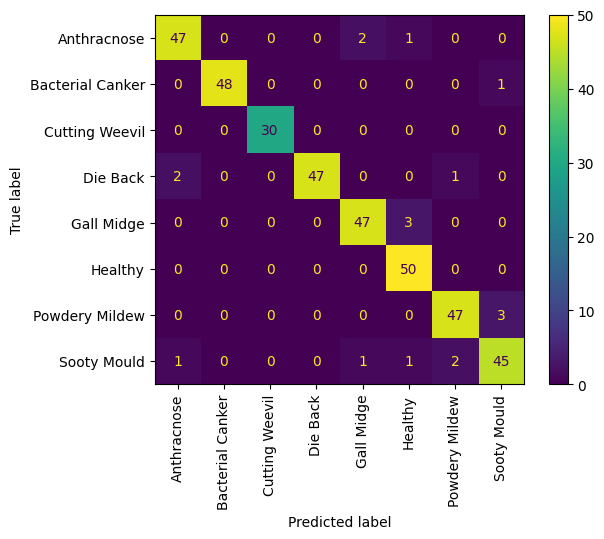

In [ ]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Anthracnose", "Bacterial Canker","Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"], )
disp.plot(xticks_rotation='vertical')

# 2. Fine Tuning

## 2.1. load the model

In [ ]:
model_2 = tf.keras.models.load_model('/content/drive/MyDrive/Mango_leaf/Model/inceptionV3_Fine-Tuning_MangoLeafBD.h5')

## 2.2. Predict

In [ ]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model_2.predict_on_batch(image_batch)

In [ ]:
predictions

array([[1.1067795e-05, 1.8496863e-08, 1.4894127e-07, 2.0990228e-07,
        8.5183787e-01, 1.4627224e-01, 1.2208955e-07, 1.8782623e-03]],
      dtype=float32)

In [ ]:
label_batch

array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
print ("The type of true labels:",type(label_batch)," and its dims",label_batch.shape)
print ("The type of predicted labels:",type(predictions)," and its dims",predictions.shape)

The type of true labels: <class 'numpy.ndarray'>  and its dims (1, 8)
The type of predicted labels: <class 'numpy.ndarray'>  and its dims (1, 8)


In [ ]:
true_label_not_one_hot, pred_ladel_not_one_hot = Convert_labels (label_batch, predictions)
print (true_label_not_one_hot.shape, pred_ladel_not_one_hot.shape)

(1,) (1,)


In [ ]:
true_label_not_one_hot

array(['Gall Midge'], dtype=object)

In [ ]:
pred_ladel_not_one_hot

array(['Gall Midge'], dtype=object)

## 2.3. Evaluation

In [ ]:
accuracy = accuracy_score(true_label_not_one_hot, pred_ladel_not_one_hot)

precision = precision_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

recall = recall_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

f1 = f1_score(true_label_not_one_hot, pred_ladel_not_one_hot, average='weighted')

conf_matrix = confusion_matrix(true_label_not_one_hot, pred_ladel_not_one_hot)
report = classification_report(true_label_not_one_hot, pred_ladel_not_one_hot, labels=["Anthracnose", "Bacterial Canker","Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"])

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("F1-score:", f1)
print(report)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
                  precision    recall  f1-score   support

     Anthracnose       0.00      0.00      0.00         0
Bacterial Canker       0.00      0.00      0.00         0
  Cutting Weevil       0.00      0.00      0.00         0
        Die Back       0.00      0.00      0.00         0
      Gall Midge       1.00      1.00      1.00         1
         Healthy       0.00      0.00      0.00         0
  Powdery Mildew       0.00      0.00      0.00         0
     Sooty Mould       0.00      0.00      0.00         0

       micro avg       1.00      1.00      1.00         1
       macro avg       0.12      0.12      0.12         1
    weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
roc_auc = roc_auc_score(true_label_not_one_hot, predictions, multi_class='ovr')
print(roc_auc)

1.0


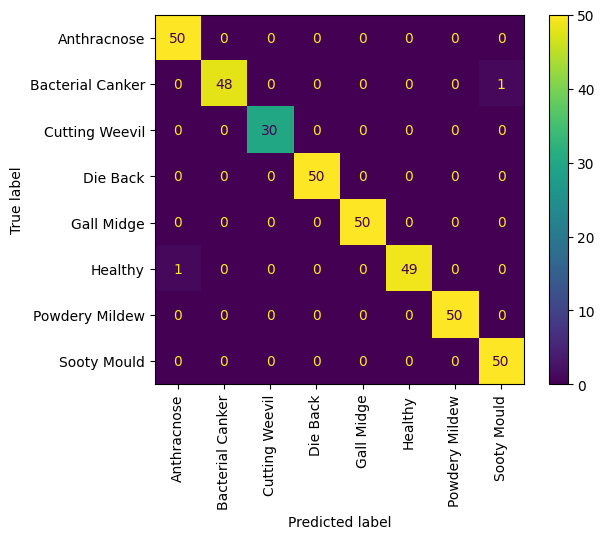

In [ ]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Anthracnose", "Bacterial Canker","Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"], )
disp.plot(xticks_rotation='vertical')

In [ ]:
import tensorflow as tf

In [ ]:
tf. __version__

'2.13.0'

In [ ]:
from tensorflow.keras.preprocessing import image
from numpy import asarray
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
img = image.load_img('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Test/Die Back/20211129_162518 (Custom).jpg', target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
#x = preprocess_input(x)

In [ ]:
predictions = model_2.predict(img_batch)

1/1 [==============================] - 0s 247ms/step


In [ ]:
label = np.argmax(predictions)

In [ ]:
dic = {0 : 'Anthracnose',
        1 : 'Bacterial Canker',
        2 : 'Cutting Weevil',
        3 : 'Die Back',
        4 : 'Gall Midge',
        5 : 'Healthy',
        6 : 'Powdery Mildew',
        7 : 'Sooty Mould'}
dic[label]

'Die Back'

In [ ]:
def output_The_Class (label):
  if label == 0:
    return 'Anthracnose'
  elif label == 1:
    return 'Bacterial Canker'
  elif label == 2:
    return 'Cutting Weevil'
  elif label == 3:
    return 'Die Back'
  elif label == 4:
    return 'Gall Midge'
  elif label == 5:
    return 'Healthy'
  elif label == 6:
    return 'Powdery Mildew'
  elif label == 7:
    return 'Sooty Mould'

In [ ]:
output_The_Class (label)

'Die Back'